# Homework 2-1


# 讀取資料
讀取資料並進行初步的資料探索，包括資料型態、缺失值、數值範圍等等。

In [1]:
import pandas as pd

file_path = 'HW2_bike-sharing_train.csv'
with open(file_path, 'r') as file:
    df = pd.read_csv(file)
    
print(df.head())
print(df.info())

            datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-1-1 00:00:00       1        0           0        1  9.84  14.395   
1  2011-1-1 01:00:00       1        0           0        1  9.02  13.635   
2  2011-1-1 02:00:00       1        0           0        1  9.02  13.635   
3  2011-1-1 03:00:00       1        0           0        1  9.84  14.395   
4  2011-1-1 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  count  
0        81        0.0     16  
1        80        0.0     40  
2        80        0.0     32  
3        75        0.0     13  
4        75        0.0      1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8386 entries, 0 to 8385
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    8386 non-null   object 
 1   season      8386 non-null   int64  
 2   holiday     8386 non-null   int64  
 3   workingday  8386 non-null   int64 

# 資料處理
1. 將 'datetime' 欄位轉換成 datetime 物件
2. 從 'datetime' 中提取年月日時
3. 刪除 'datetime' 欄位
4. 列出更改後的資料



In [2]:
df['datetime'] = pd.to_datetime(df['datetime'])

df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year

df.drop('datetime', axis=1, inplace=True)

print(df.head())

   season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   count  hour  day  month  year  
0     16     0    1      1  2011  
1     40     1    1      1  2011  
2     32     2    1      1  2011  
3     13     3    1      1  2011  
4      1     4    1      1  2011  


# 資料分離
1. 將 'count' 欄位取出作為 y
2. 將其他欄位取出作為 X(特徵)

In [9]:
X = df.drop('count', axis=1)
y = df['count']
print("X資料集")
print(X.head())
print("-----------------")
print("y資料集")
print(y.head(10))

X資料集
   season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   hour  day  month  year  
0     0    1      1  2011  
1     1    1      1  2011  
2     2    1      1  2011  
3     3    1      1  2011  
4     4    1      1  2011  
-----------------
y資料集
0    16
1    40
2    32
3    13
4     1
5     1
6     3
7     8
8    14
9    36
Name: count, dtype: int64


# 訓練線性回歸模型
1. 拆分資料集: 80% 訓練集, 20% 測試集
2. 使用線性回歸模型
3. 評估線性模型誤差(越小越好)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# 拆分資料集: 80% 訓練集, 20% 測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#　使用線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# 評估線性模型誤差(越小越好)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 18265.881228499984


# 使用baseline model
baseline model作為一個基準模型預測數據: 預測值為訓練集的平均值

In [11]:
import numpy as np

y_baseline_pred = np.full_like(y_test, y_train.mean())

baseline_mse = mean_squared_error(y_test, y_baseline_pred)
print(f'Baseline Mean Squared Error: {baseline_mse}')

Baseline Mean Squared Error: 30719.206793802146


# 視覺化線性回歸模型的預測結果
1. 使用散點圖顯示實際值與預測值
2. 使用折線圖顯示實際值與預測值

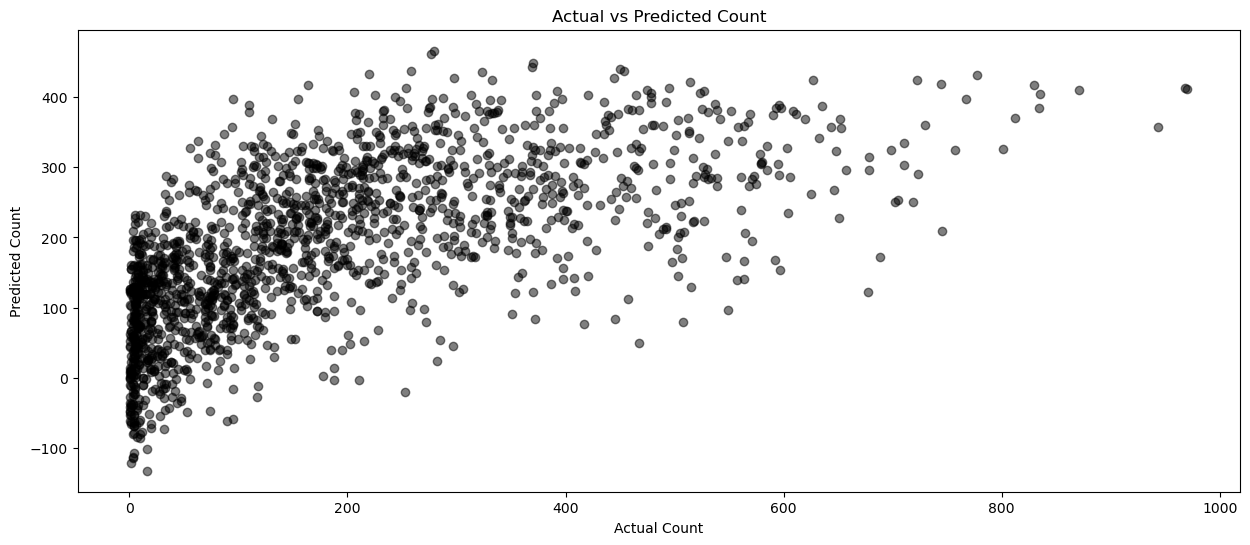

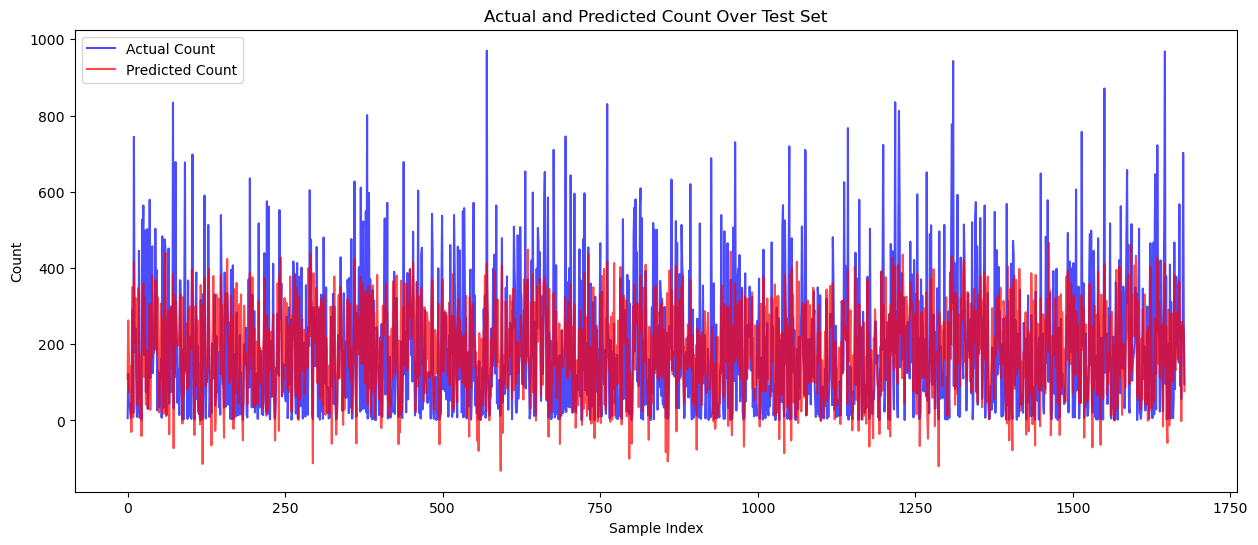

In [13]:
import matplotlib.pyplot as plt

# Scatter plot with different color
plt.figure(figsize=(15, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='black')
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.title('Actual vs Predicted Count')
plt.show()

# Line plot with different colors and transparency
plt.figure(figsize=(15, 6))
plt.plot(y_test.values, label='Actual Count', alpha=0.7, color='blue')
plt.plot(y_pred, label='Predicted Count', alpha=0.7, color='red')
plt.xlabel('Sample Index')
plt.ylabel('Count')
plt.title('Actual and Predicted Count Over Test Set')
plt.legend()
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the scaled model
scaled_model = LinearRegression()
scaled_model.fit(X_train_scaled, y_train)

# Make predictions with both models
y_pred = model.predict(X_test)  # Original model
y_pred_scaled = scaled_model.predict(X_test_scaled)  # Scaled model

# Evaluate both models
mse = mean_squared_error(y_test, y_pred)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)

print(f'Mean Squared Error (original): {mse}')
print(f'Mean Squared Error (scaled): {mse_scaled}')

Mean Squared Error (original): 18265.881228499984
Mean Squared Error (scaled): 18265.88122850024


In [16]:
from sklearn.linear_model import Ridge

# Train Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust alpha to find the best value
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error (Ridge): {mse_ridge}')

Mean Squared Error (Ridge): 18265.64442426712


In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create polynomial features (degree 2 for quadratic)
poly = PolynomialFeatures(degree=2)

# Transform the features
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train a linear regression model on the polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Make predictions
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f'Mean Squared Error (Polynomial): {mse_poly}')


Mean Squared Error (Polynomial): 13910.71814270488


In [12]:
def polynomial_model(degree, X_train, X_test, y_train, y_test):
    poly = PolynomialFeatures(degree=degree)
    
    # Transform the features
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Train a linear regression model on the polynomial features
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    
    # Make predictions
    y_pred_poly = poly_model.predict(X_test_poly)
    
    # Evaluate the model
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    print(f'Mean Squared Error (Polynomial Degree {degree}): {mse_poly}')
    
    return mse_poly

# Compare different degrees of polynomial regression
mse_degree2 = polynomial_model(2, X_train, X_test, y_train, y_test)
mse_degree3 = polynomial_model(3, X_train, X_test, y_train, y_test)
mse_degree4 = polynomial_model(4, X_train, X_test, y_train, y_test)

Mean Squared Error (Polynomial Degree 2): 13910.71814270488
Mean Squared Error (Polynomial Degree 3): 11886.970875082676
Mean Squared Error (Polynomial Degree 4): 67846.87144690363


In [13]:
from sklearn.model_selection import cross_val_score

# Function to perform cross-validation for polynomial models
def cross_val_polynomial(degree, X, y):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    
    model = LinearRegression()
    
    # Perform 5-fold cross-validation
    scores = cross_val_score(model, X_poly, y, cv=5, scoring='neg_mean_squared_error')
    avg_mse = -scores.mean()  # Get the mean of the negative MSE scores (they are negative by default)
    print(f'Cross-validated MSE (Polynomial Degree {degree}): {avg_mse}')
    
    return avg_mse

# Apply cross-validation for different degrees
mse_cv_degree2 = cross_val_polynomial(2, X, y)
mse_cv_degree3 = cross_val_polynomial(3, X, y)
mse_cv_degree4 = cross_val_polynomial(4, X, y)

Cross-validated MSE (Polynomial Degree 2): 18678.640312421812
Cross-validated MSE (Polynomial Degree 3): 582021.4043971936
Cross-validated MSE (Polynomial Degree 4): 931146097.6342967


In [18]:
poly = PolynomialFeatures(degree=3)
    
# Transform the features
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train a linear regression model on the polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Make predictions
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f'Mean Squared Error (Polynomial Degree 3): {mse_poly}')

Mean Squared Error (Polynomial Degree 3): 11886.970875082676


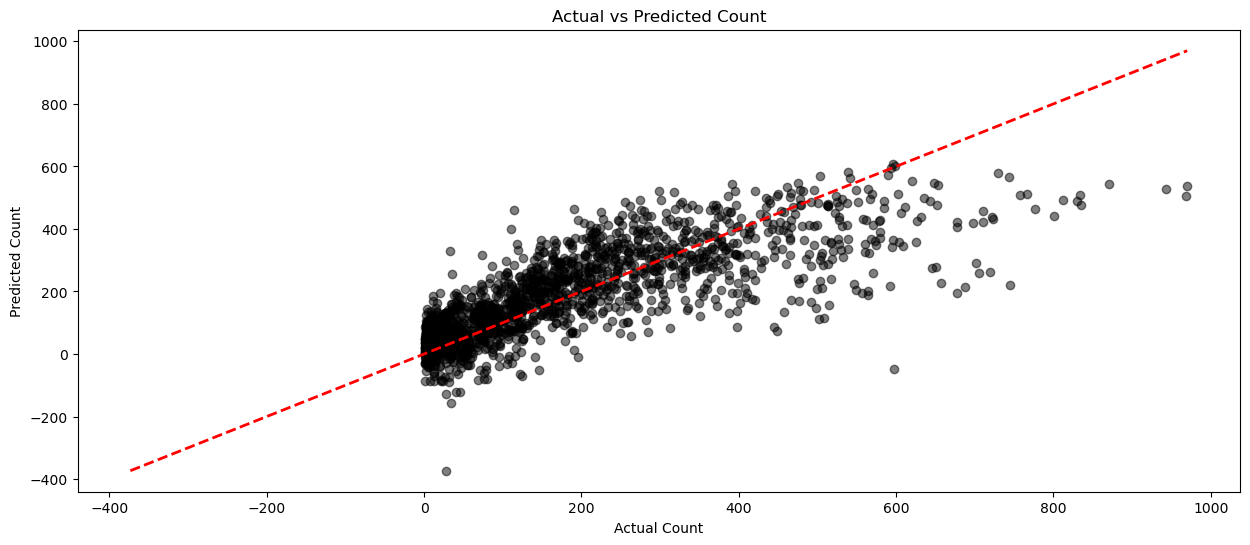

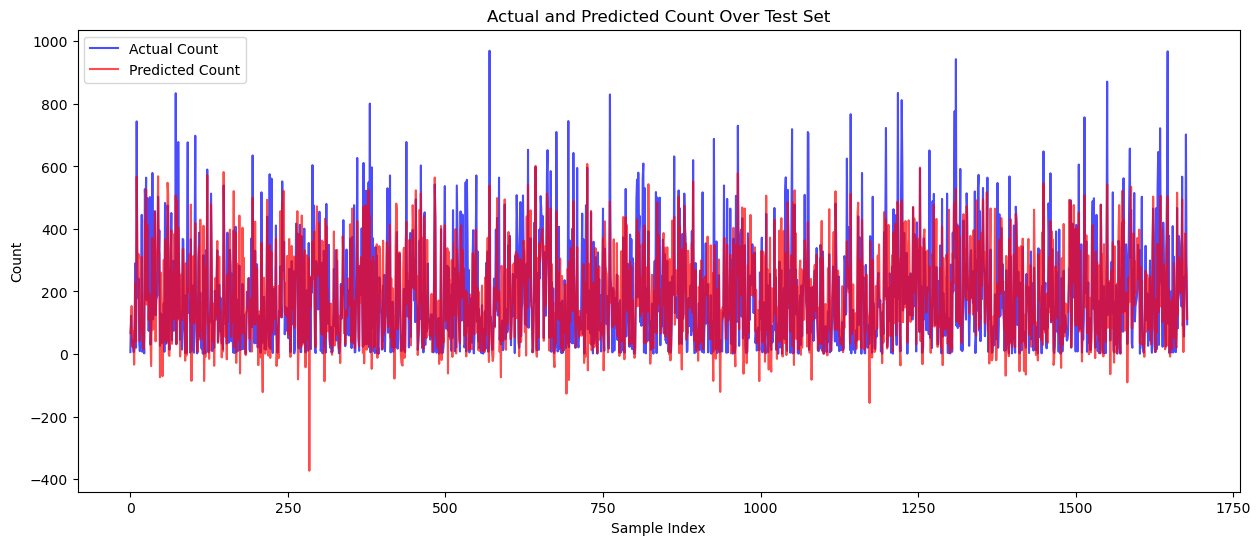

In [20]:
# Scatter plot with different color
plt.figure(figsize=(15, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.5, color='black')
# Add diagonal line (y = x line)
min_val = min(min(y_test), min(y_pred_poly))
max_val = max(max(y_test), max(y_pred_poly))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Ideal Fit (y = x)')

plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.title('Actual vs Predicted Count')
plt.show()

# Line plot with different colors and transparency
plt.figure(figsize=(15, 6))
plt.plot(y_test.values, label='Actual Count', alpha=0.7, color='blue')
plt.plot(y_pred_poly, label='Predicted Count', alpha=0.7, color='red')
plt.xlabel('Sample Index')
plt.ylabel('Count')
plt.title('Actual and Predicted Count Over Test Set')
plt.legend()
plt.show()

In [ ]:
# todo: predict test data  from HW2_bike-sharing_test.csv